<a href="https://colab.research.google.com/github/zqiaohe/datascience/blob/master/homework_module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание. Титаник
В этом домашнем задании вам предлагается решить задачу предсказания выживших пассажиров Титаника. Эту задачу машинного обучения рано или поздно решает, наверное, любой, кто обучается анализу данных. Информация о датасете доступна по <a href=https://www.kaggle.com/c/titanic.>ссылке</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Загрузка данных

Загрузим датасет Titanic из приложенных файлов. В первом файле находится информация о пассажирах, во втором -- информация о том, выжил пассажир или нет.

Если вы запускаете ноутбук на Google Colab, самым простым способом загрузить данные в ноутбук будет примонтировать к Colab ваш Google Drive. Для этого сначала положите в свою корневую директорию Google Drive  файлы, приложенные к этому ноутбуку, а затем выполните три закоментированные строчки в клетке ниже. <a href=https://www.machinelearningmastery.ru/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166/>Подробная инструкция по работе с Google Drive + Google Colab</a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/My Drive/datascience/titanic/titanic_data.csv', index_col='PassengerId')

#Если запускаете ноутбук локально:
#data = pd.read_csv('titanic_data.csv', index_col='PassengerId')

In [4]:
basic_features = data.columns

y = pd.read_csv('/content/drive/My Drive/datascience/titanic/titanic_surv.csv')
y.index = data.index

print(f'Всего {len(data)} пассажиров в выборке')
data.head()

Всего 891 пассажиров в выборке


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
y.head()

,Survived
PassengerId,
1,0
2,1
3,1
4,1
5,0


In [6]:
data = data.join(y)
data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
PassengerId,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


## Исследование датасета

### Задание 1 (1 балл)
Опишите датасет. Сколько в нём мужчин, сколько женщин? Посчитайте распределение по классам пассажиров. Используйте функцию ``pd.Series.value_counts``. <a href=https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.value_counts.html>Пример использования</a>

Посчитайте долю выживших мужчин к общему количеству мужчин, а также женщин к общему количеству женщин. Сделайте выводы. 
Проведите схожую аналитику по возрасту выживших и по классу выживших. 

Вам поможет функция ``plt.hist()``. <a href=https://matplotlib.org/3.3.1/gallery/pyplots/pyplot_text.html#sphx-glr-gallery-pyplots-pyplot-text-py> Пример использования </a> 

In [8]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

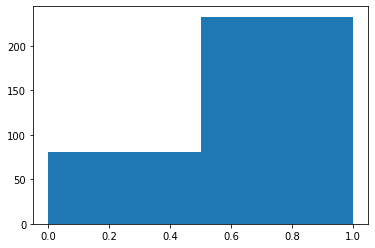

In [9]:
plt.hist(data[data['Sex']=='female']['Survived'], bins=2)
plt.show()

In [10]:
len(data[(data['Survived']==1)&(data['Sex']=='female')])/len(data[(data['Sex']=='female')]) 

0.7420382165605095

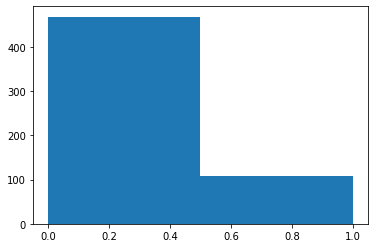

In [11]:
plt.hist(data[data['Sex']=='male']['Survived'], bins=2)
plt.show()

In [12]:
len(data[(data['Survived']==1)&(data['Sex']=='male')])/len(data[(data['Sex']=='male')]) 

0.18890814558058924

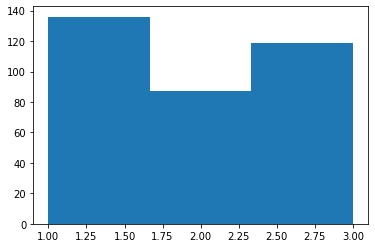

In [13]:
plt.hist(data[data['Survived']==1]['Pclass'], bins=3)
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


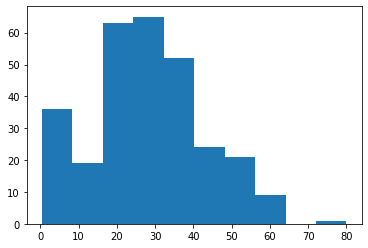

In [14]:
plt.hist(data[data['Survived']==1]['Age'])
plt.show()

## Заполнение пропусков в данных
В данных имеются пропуски в трёх колонках: 

In [15]:
data.columns[data.isna().any()].tolist()

['Age', 'Cabin', 'Embarked']

Для простоты заполним все пропуски в категориальных колонках новым классом "0", а в числовой колонке Age --- медианным значением. 

In [16]:
data.loc[:, ['Cabin', 'Embarked']] = data.loc[:, ['Cabin', 'Embarked']].fillna('0')
data['Age'] = data['Age'].fillna(data['Age'].median())

## Подготовка плана тестирования

### Задание 2. (0 баллов)
Разделите выборку на обучающее и тестовое множество в соотношении 70:30.

In [17]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.3)

## Выделение новых признаков
Теперь отложим тестовые данные и приступим к моделированию. Внимательно изучите данные. Можете ли вы выделить признаки, которые не указаны явно в таблице?

### Задание 3 (1 балл)
 Сформируйте по крайней мере один новый признак и объясните ваш выбор. Пример признака сформирован за вас. 

Указания: 
- Пассажиров можно поделить на несколько классов по их именам.
- Различных номеров кают слишком много. Но буквы в номерах кают указывают на их местоположение. (***Этот признак сформирован в примере***)
- Возможно, имеет смысл отделить мальчиков от мужчин. Отделять девочек от женщин может быть не так важно
- Другие идеи для признаков можно почерпнуть на форуме в обсуждении задачи на kaggle.com.

In [18]:
data_full = data

In [19]:
def get_cabin_letter(row):
    return row['Cabin'][0]

data_full['cabin_type'] = data.apply(get_cabin_letter, axis=1)

Сюда добавьте описание вашего нового признака

In [20]:
def get_age_group(row): #rename this function appropriately
  if  row['Age']<=12:
    return 'child'
  elif row['Age']<18 and row['Age']>12:
    return 'teen'
  else:
    return 'adult'

data_full = data
data_full['Age_group'] = data.apply(get_age_group, axis=1)

In [21]:
data_full

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived,cabin_type,Age_group
PassengerId,,,,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S,0,0,adult
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,C,adult
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S,1,0,adult
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,C,adult
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S,0,0,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S,0,0,adult
888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,B,adult
889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,0,S,0,0,adult


## Кодирование категориальных признаков и обработка данных
Все признаки сейчас делятся на числовые, бинарные, категориальные и текстовые. К текстовым признакам можно отнести имя пассажира, номер билета и номер каюты: значения этих признаков уникальны почти для всех пассажиров, и простого способа использовать их в модели не существует.

### Задание 4 (0 баллов)
Пока используя только изначальные признаки, перекодируйте категориальные признаки функцией ``pd.get_dummies``. Естественно, имена пассажиров и номера билетов и кают кодировать не стоит, поскольку все значения этих признаков уникальные. 

In [22]:
cats1 = ['Pclass', 'Sex', 	'SibSp', 	'Parch', 'Embarked']
cats2 = ['Pclass', 'Sex', 	'SibSp', 	'Parch', 'Embarked', 'Age_group', 'cabin_type']

In [23]:
features = [ 'Age','Fare']
base = ['Pclass', 'Sex', 	'SibSp', 	'Parch', 'Embarked', 'Age','Fare']

In [24]:
data2 = pd.get_dummies(data[cats1]).join(data[features])
data_full = pd.get_dummies(data_full[cats2]).join(data_full[features])


In [25]:
X_train, X_test, y_train, y_test = train_test_split(data2, y, test_size=0.30, random_state=42)

## Обучение baseline-модели

### Задание 5 (1 балл)

Обучите одну из простых известных вам моделей. Измерьте качество полученной модели на кросс-валидации (используйте только обучающую выборку!)

In [38]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
result = cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, scoring='neg_mean_absolute_error', cv=5)
np.mean(result)


-0.30312489374747204

### Задание 6 (1 балл)
Добавьте в модель два новых сгенерированных признака. Если нужно, добавьте признаки, сгенерированные ohe-hot кодированием. Обучите ту же самую модель на расширенном множестве признаков. Улучшилось ли качество предсказания на кросс-валидации?

In [39]:
result = cross_val_score(estimator=LinearRegression(), X=X_train2, y=y_train2, scoring='neg_mean_absolute_error', cv=5)
np.mean(result)


-0.29550229757083296

In [41]:
X_train2

,Pclass,SibSp,Parch,Sex_female,Sex_male,Embarked_0,Embarked_C,Embarked_Q,Embarked_S,Age_group_adult,Age_group_child,Age_group_teen,cabin_type_0,cabin_type_A,cabin_type_B,cabin_type_C,cabin_type_D,cabin_type_E,cabin_type_F,cabin_type_G,cabin_type_T,Age,Fare
PassengerId,,,,,,,,,,,,,,,,,,,,,,,
446,1,0,2,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,4.0,81.8583
651,3,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,28.0,7.8958
173,3,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1.0,11.1333
451,2,1,2,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,36.0,27.7500
315,2,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,43.0,26.2500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,3,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,21.0,7.6500
271,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,28.0,31.0000
861,3,2,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,41.0,14.1083


## Дополнительное моделирование
### Задание 7 (2 балла)
Теперь более серьёзно подойдём к моделированию. Попробуйте несколько алгоритмов из тех, что мы проходили в курсе. Вам помогут ноутбуки с линейными алгоритмами и выбором модели. Хотя бы для одного алгоритма проведите подбор оптимального гиперпараметра. 

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
params = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20], 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
clf = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5)
clf.fit(X_train, y_train)
    

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
params = {'max_depth':[4,5,6,7,8,9,10,11,12,15,20], 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
clf2 = GridSearchCV(DecisionTreeRegressor(random_state=42), params, cv=5)
clf2.fit(X_train2, y_train2)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=42, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            

In [79]:
clf.best_estimator_

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                      max_features=None, max_leaf_nodes=8,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

## Результаты моделирования

### Задание 8 (1 балл)
Измерьте качество итоговой модели на кросс-валидации. Выполните предсказание на тестовом множестве и сохраните их в переменную ``y_test``. Измерьте итоговое качество на тестовом множестве.

*Наверное, имелось ввиду y_preds, но я сохраню в y_test, раз уж так рекомендуется. *

In [80]:
result = cross_val_score(estimator=clf.best_estimator_, X=X_train, y=y_train, scoring='neg_mean_absolute_error', cv=5)
np.mean(result)

-0.2585475412672958

In [81]:
result = cross_val_score(estimator=clf2.best_estimator_, X=X_train, y=y_train, scoring='neg_mean_absolute_error', cv=5)
np.mean(result)

-0.2585475412672958

In [82]:
y_true = y_test
y_test = clf.predict(X_test)
mean_absolute_error(y_true, y_test)

0.26265953814024845

## Выводы
### Задание 9 (3 балла)
Сделайте выводы. Какие из идей сработали? Какие оказались лишними?

 **На модели линейной регрессии увеличение числа признаков немного помогло, хотя и не существенно, а на регрессоре с решающими деревьями результаты оказались идентичными. **